# Кластерный анализ

Кластеризация — это метод машинного обучения, который включает группировку данных в пространстве признаков. Теоретически, точки, находящиеся в одной группе, должны иметь схожие свойства, в то время как точки в разных группах должны иметь сильно отличающиеся свойства.

Кластеризация является методом обучения без учителя и распространенным методом статистического анализа данных, используемым во многих областях. В частности используется при составлении портретов пользователей, поиска аномалий.

В анализе данных часто прибегают к кластеризации, чтобы получить ценную информацию из данных, наблюдая, в какие группы попадают точки при применении алгоритма кластеризации.

## Этап 1. Загрузка данных

In [155]:
# вначале импортируем библиотеки

# Импортируем библиотеку numpy для работы с массивами и матрицами,
# а также выполнения математических операций над ними.
import numpy as np

# Используем plotly для создания графиков и визуализации данных.
# Это позволит нам лучше понять и представить результаты нашего анализа.
import plotly.express as px
import plotly.graph_objects as go # Создаем фигуру с заданными размерами
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Библиотека pandas позволяет удобно работать с данными в формате таблиц,
# включая чтение из CSV-файлов, манипуляции с данными и их анализ.
import pandas as pd

# импортируем необходимый класс из модуля preprocessing библиотеки sklearn для нормализации
from sklearn.preprocessing import StandardScaler

# импортируем набор данных из модуля datasets библиотеки sklearn
from sklearn.datasets import load_iris

# импортируем нужный класс для кластеризации k-means
from sklearn.cluster import KMeans

# Импорт функций silhouette_samples и silhouette_score
# из модуля sklearn.metrics для расчета коэффициента силуэта для каждого
# образца и общего коэффициента силуэта для всего набора данных.
from sklearn.metrics import silhouette_samples, silhouette_score

# Импортируем функции dump и load из модуля joblib.
# Эти функции позволяют сохранять и загружать объекты Python, включая модели машинного обучения,
# для последующего использования без необходимости повторного обучения модели.
from joblib import dump, load

# PCA (Principal Component Analysis) из sklearn.decomposition применяется для сокращения размерности данных
# путем выделения наиболее значимых компонентов.
from sklearn.decomposition import PCA

In [156]:
import warnings # отключить педупреждения
warnings.filterwarnings("ignore")

In [157]:
iris = load_iris()

In [158]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [159]:
# создаем датафрейм, берем данные из iris.data и название столбцов из iris.feature_names
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

# смотрим первые пять значений
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [161]:
# посмотрим на размерность
iris_df.shape

(150, 4)

## Этап 2. Предаварительная обработка данных

In [162]:
# проверим, есть ли пропущенные значения
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [110]:
# проверим нужна ли нормализация (строим "ящики с усами" или box plot)
px.box(iris_df)

In [163]:
# создадим объект класса StandardScaler для нормализации (путем вычитания среднего значения и масштабирования до единичной дисперсии)
scaler = StandardScaler()

# приведем данные к единому масштабу
iris_scaled = scaler.fit_transform(iris_df)

# заново создадим датафрейм с нормализованными значениями
iris_df_scaled = pd.DataFrame(iris_scaled, columns = iris.feature_names)

# посмотрим на первые пять строк
iris_df_scaled.round(2).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.90,1.02,-1.34,-1.32
1,-1.14,-0.13,-1.34,-1.32
2,-1.39,0.33,-1.40,-1.32
3,-1.51,0.10,-1.28,-1.32
4,-1.02,1.25,-1.34,-1.32


In [164]:
# проверим нужна ли нормализация (строим "ящики с усами" или box plot)
px.box(iris_df_scaled)

## Этап 3. EDA и отбор признаков

In [165]:
# Признаков всего 4, оставим все признаки
# для наглядности поместим наши данные в переменную Х
# целевой переменной или таргета у нас нет (для кластеризации не нужна)
X = iris_df_scaled
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


## Этап 4. Обучение и оценка качества модели

### K-means

Напомним, что сам алгоритм можно схематически представить в виде следующих шагов:

1. Инициализируем центры кластеров случайно (должно быть задано количество кластеров).

2. Относим точки к соответствующим кластерам (с минимальным расстоянием до их центра).

3. Производится пересчет центров кластеров по формуле центра масс для всех точек, принадлежащих кластеру.

4. Пункты 2-3 повторяются до тех пор пока центры кластеров перестанут меняться (сильно).

### Выбор количества кластеров (настройка гиперпараметра)

In [167]:
# создадим пустой список для записи показателя WCSS (ошибки, cуммы квадратов внутрикластерных расстояний)
wcss = []

# воспользуемся функцией range(), она возвращает последовательность чисел
# в данном случае числа от 1 до 10
min_range = 1
max_range = 11 # до максимального, не включая

for i in range(min_range, max_range):
    # настроим параметры модели
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10, random_state = 42)

    # обучим модель на наших данных с разным количеством кластеров
    kmeans.fit(X)

    # для каждого кластера рассчитаем ошибку (атрибут inertia_) и поместим в список
    wcss.append(kmeans.inertia_)


In [168]:
# Создаем фигуру с заданными размерами
fig = go.Figure()

# Добавляем линейный график с данными о WCSS по количеству кластеров
fig.add_trace(go.Scatter(x=list(range(1, 11)), y=wcss, mode='lines', name='WCSS'))

# Настройка заголовков и осей
fig.update_layout(
    title='Выбор количества кластеров методом локтя',
    xaxis_title='Количество кластеров',
    yaxis_title='WCSS'
)

# Отображаем график
fig.show()

In [170]:
# Уменьшение размерности входных данных с помощью PCA
reduced_data = PCA(n_components=2).fit_transform(X) # использовать, когда более 3 признаков
reduced_data

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

For n_clusters = 2 The average silhouette_score is : 0.6145202036222636
For n_clusters = 3 The average silhouette_score is : 0.5113245176427448
For n_clusters = 4 The average silhouette_score is : 0.4445080234949916
For n_clusters = 5 The average silhouette_score is : 0.4143377562602961
For n_clusters = 6 The average silhouette_score is : 0.41458546511031197
For n_clusters = 7 The average silhouette_score is : 0.42572649138597674
For n_clusters = 8 The average silhouette_score is : 0.4423503224651476
For n_clusters = 9 The average silhouette_score is : 0.43976650185690747
For n_clusters = 10 The average silhouette_score is : 0.4371951405600568


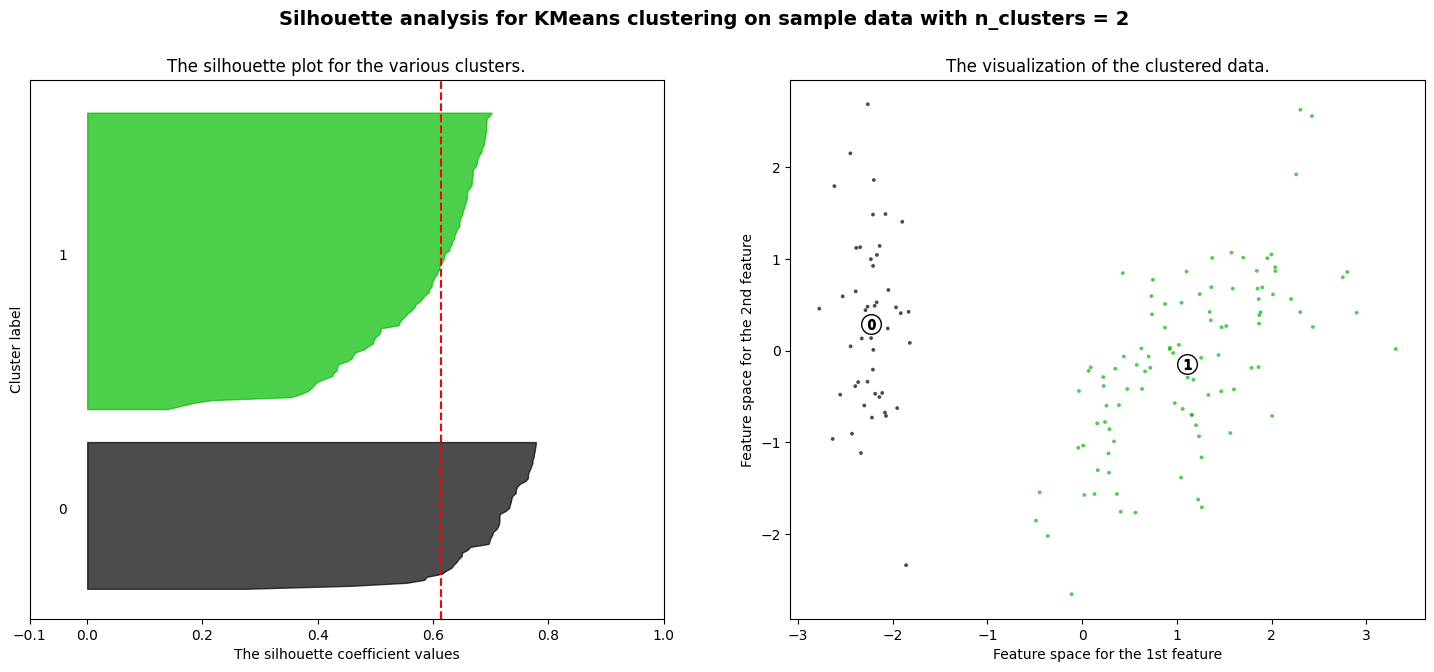

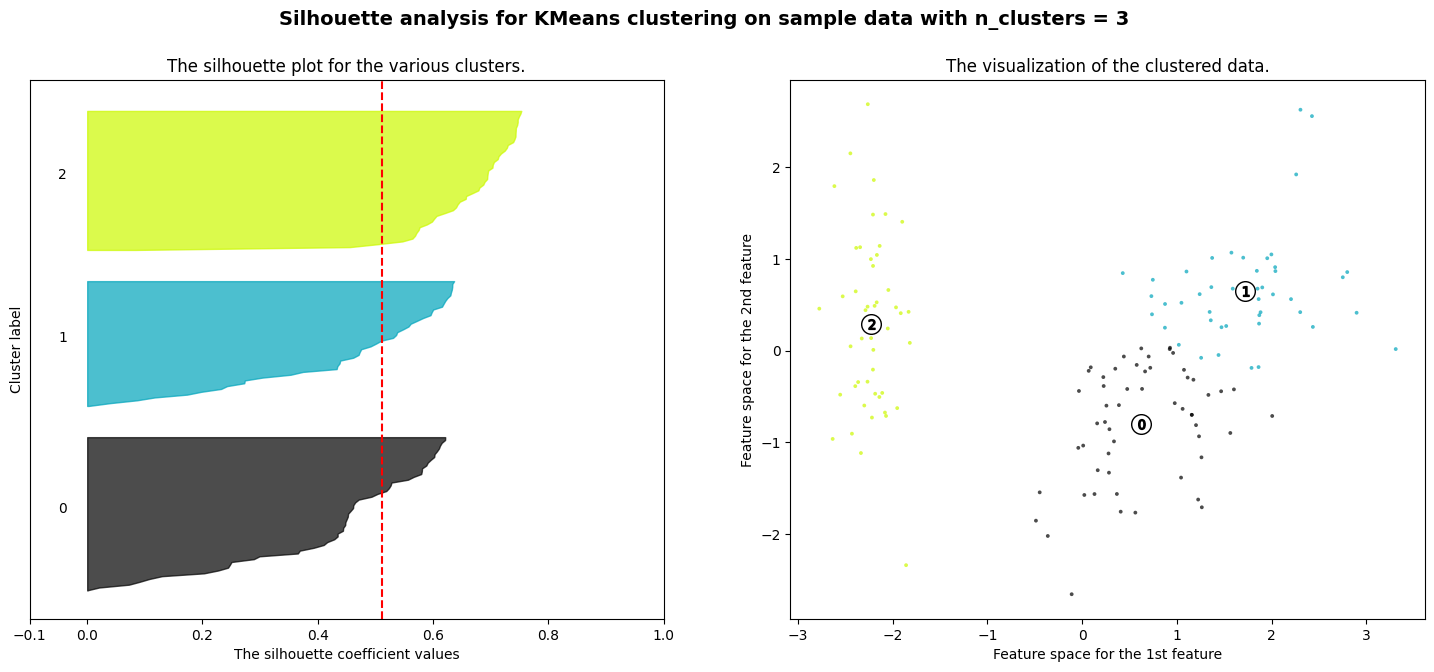

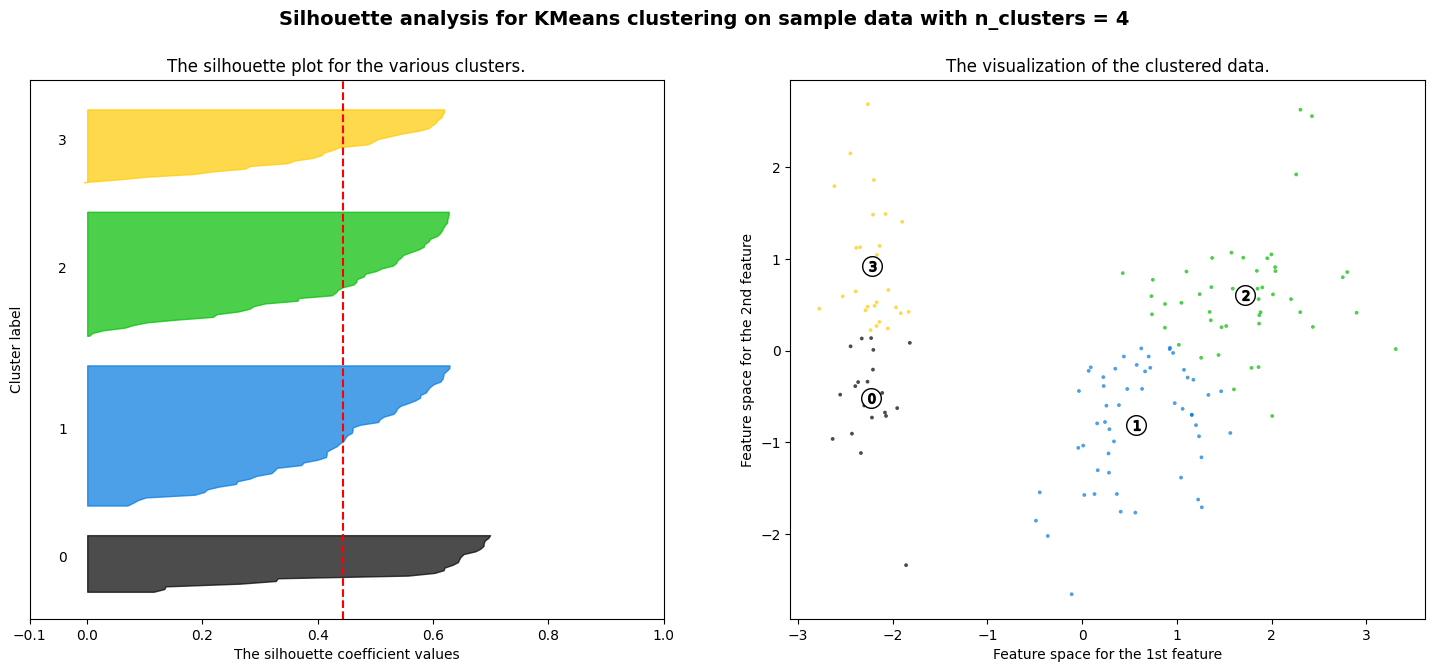

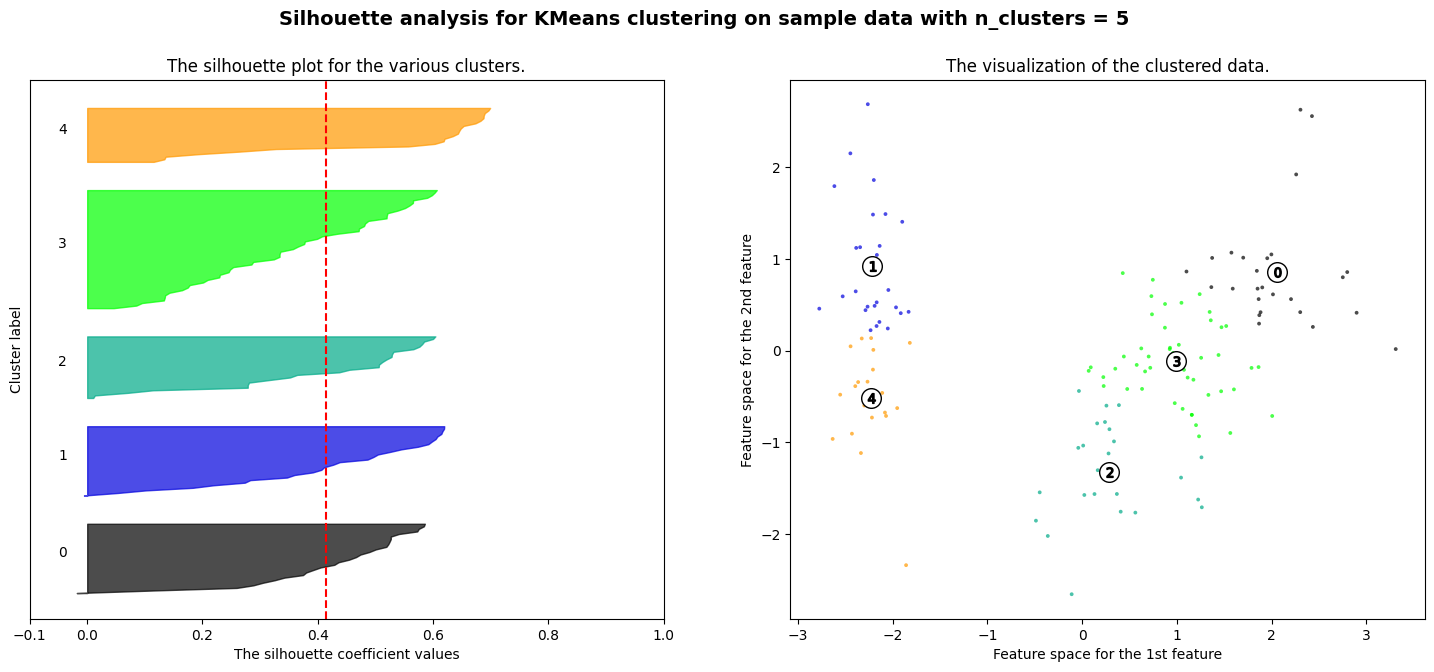

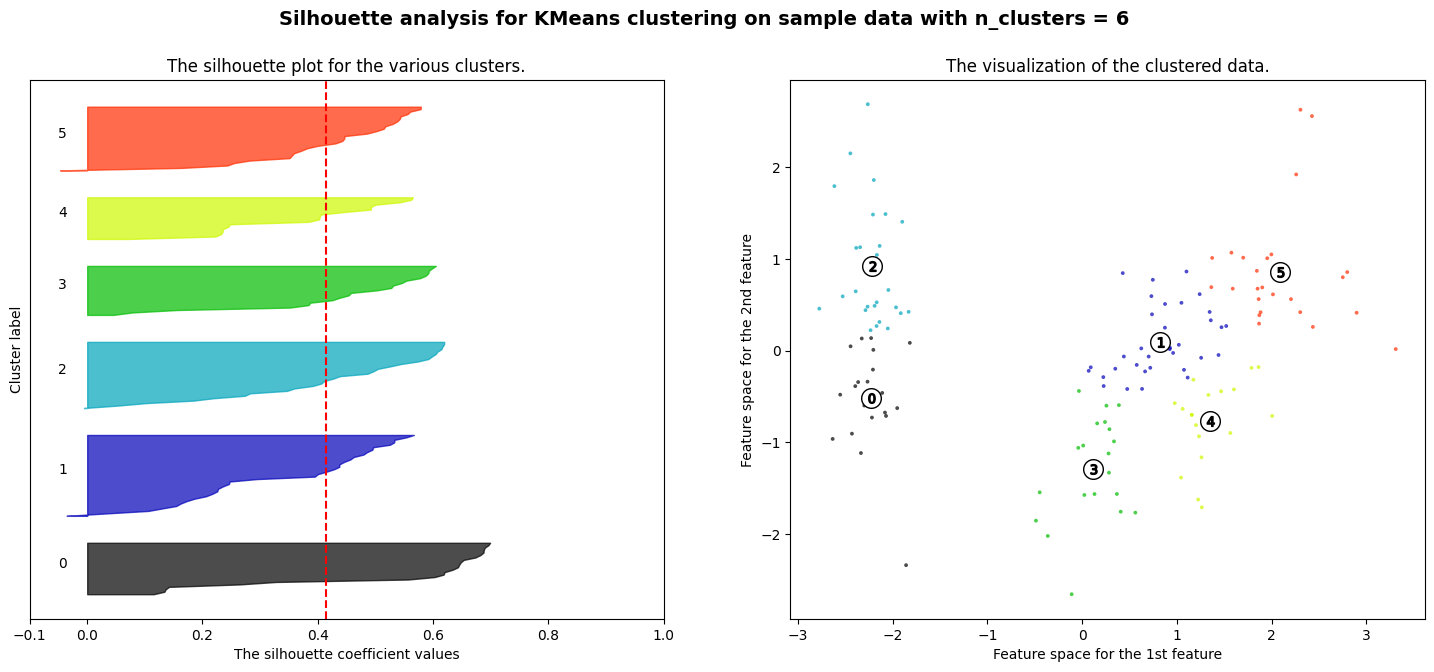

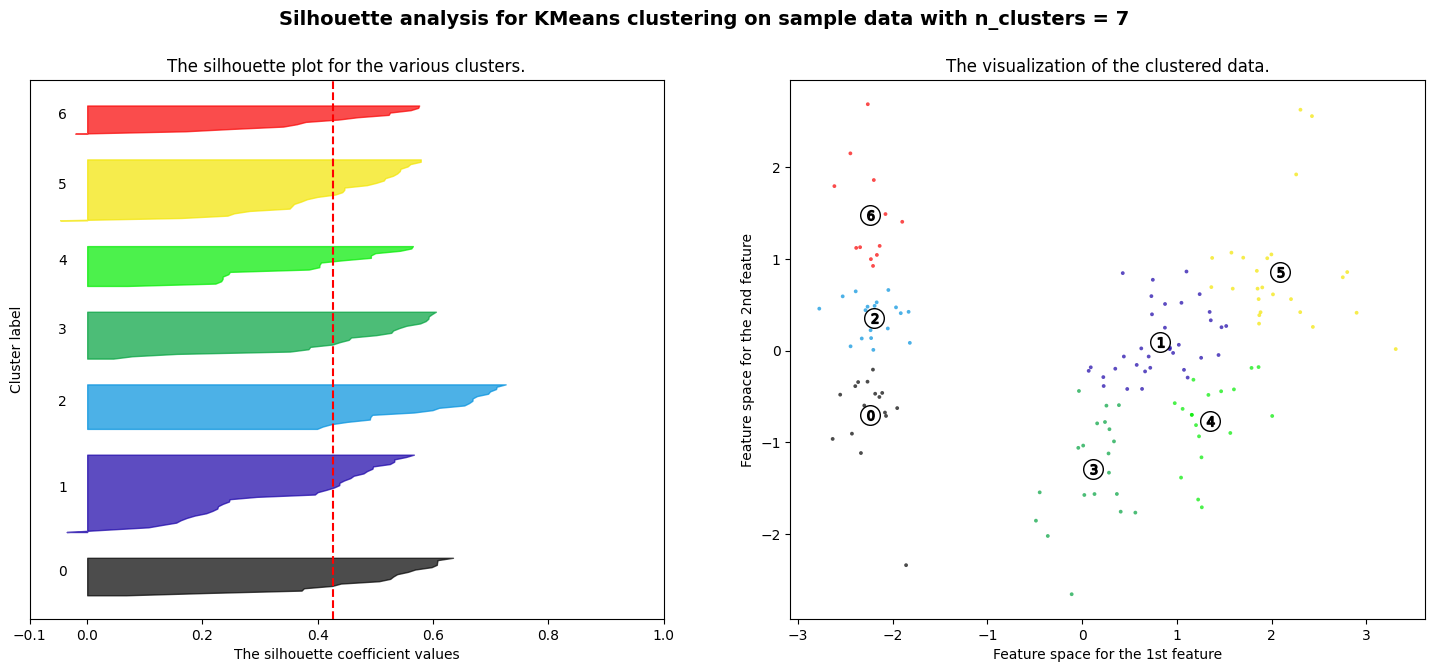

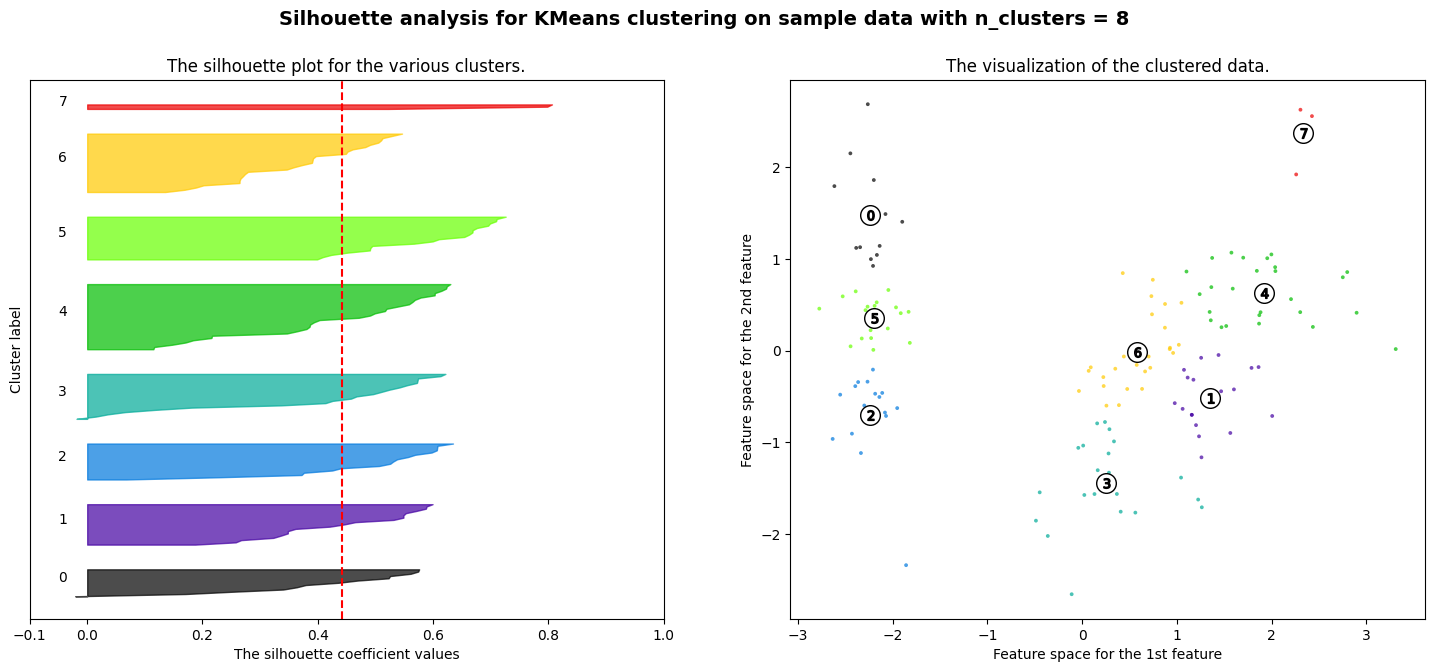

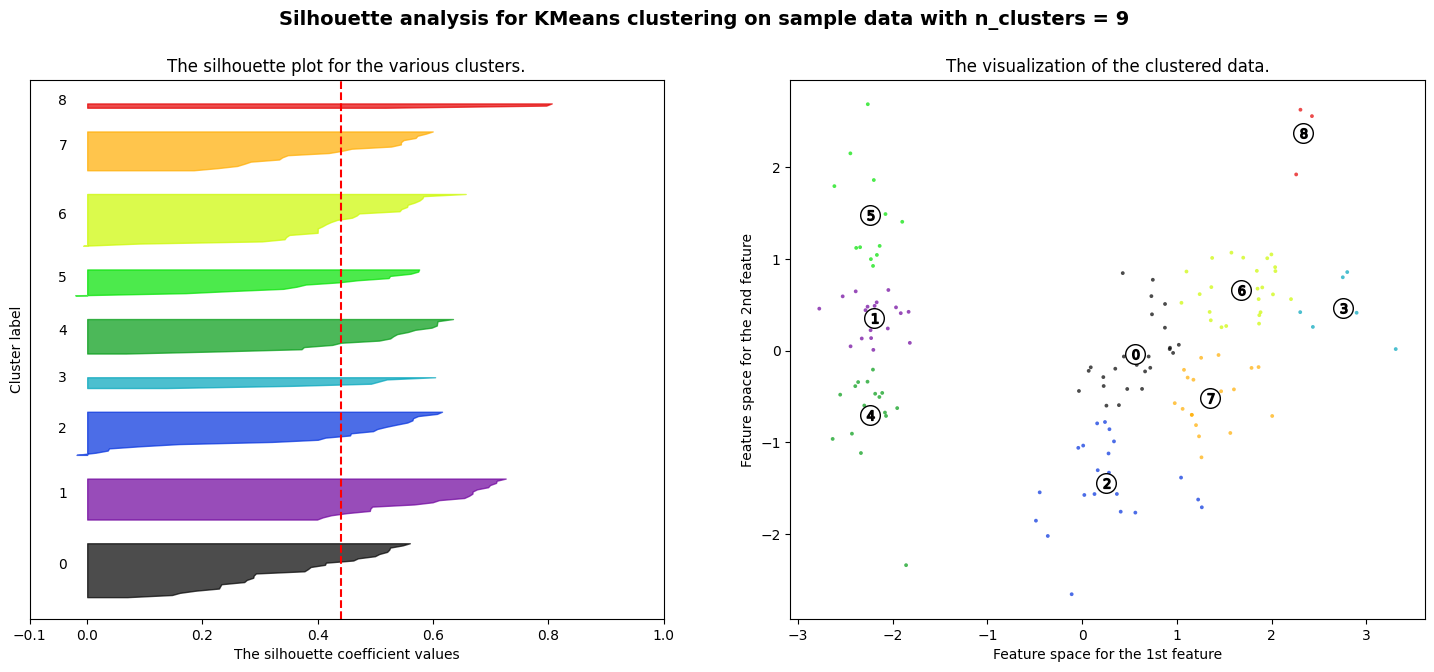

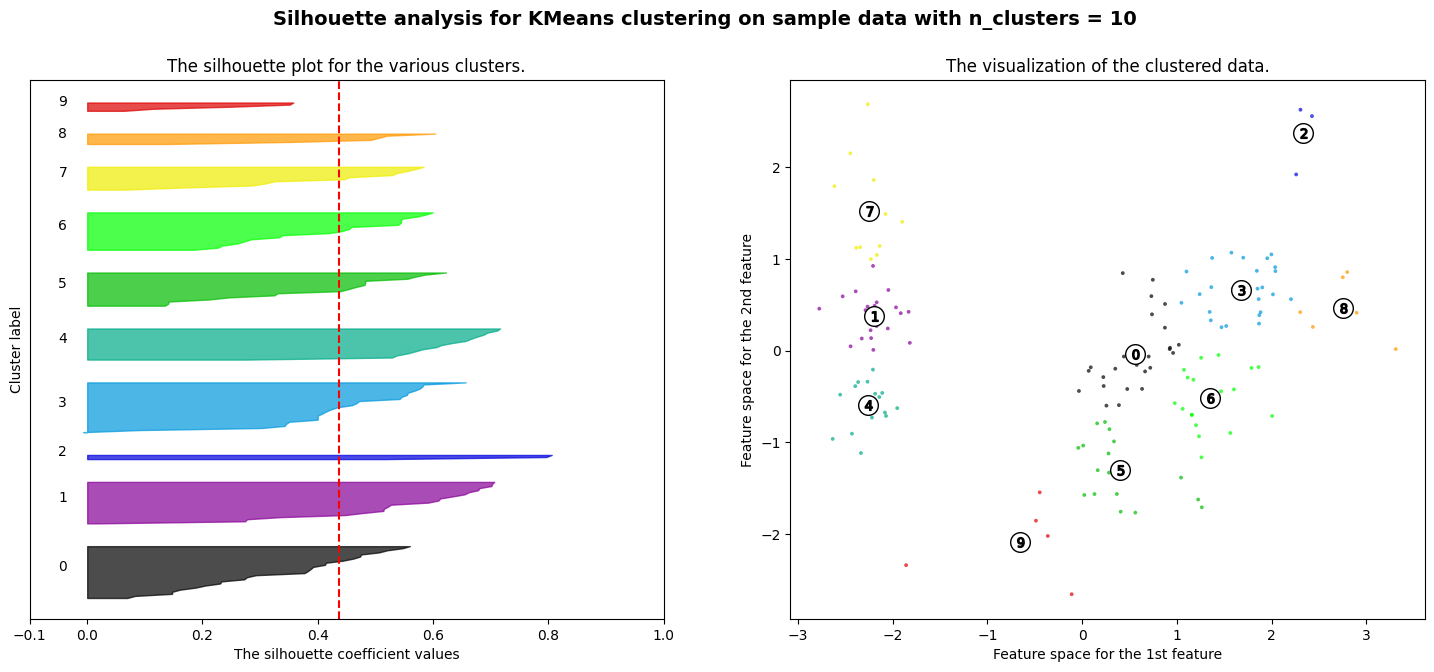

In [171]:
# Создадим пустой список для записи коэффициентов силуэта для каждого образца
sample_silhouette_values = []

# Воспользуемся функцией range(), она возвращает последовательность чисел
# в данном случае числа от 1 до 10
min_range = 2
max_range = 11  # до максимального, не включая

for i in range(min_range, max_range):
    # Создайте подзаголовок с 1 строкой и 2 столбцами
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # Первый подсюжет — это график силуэта
    # Коэффициент силуэта может варьироваться от -1 до 1, но в этом примере все
    # лежат в пределах [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # (n_clusters+1)*10 предназначен для вставки пустого пространства между силуэтами
    # графики отдельных кластеров, чтобы четко их разграничить.
    ax1.set_ylim([0, len(reduced_data) + (i + 1) * 10])

    # Инициализируем кластеризатор значением n_clusters и генератором случайных чисел
    # начальное число из 10 для воспроизводимости.
    clusterer = KMeans(n_clusters=i, random_state=10)
    cluster_labels = clusterer.fit_predict(reduced_data)

    # Silhouette_score дает среднее значение для всех образцов.
    # Это дает представление о плотности и разделении образовавшихся
    # clusters
    silhouette_avg = silhouette_score(reduced_data, cluster_labels)
    print(
        "For n_clusters =", i, "The average silhouette_score is :", silhouette_avg,
    ) # рассчет коэффициента, можно без визуализации

    # Вычисляем оценки силуэта для каждого образца
    sample_silhouette_values = silhouette_samples(reduced_data, cluster_labels)

    y_lower = 10
    for j in range(i):
        # Объединить оценки силуэтов для образцов, принадлежащих
        # кластер j и отсортируйте их
        jth_cluster_silhouette_values = sample_silhouette_values[cluster_labels == j]

        jth_cluster_silhouette_values.sort()

        size_cluster_j = jth_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_j

        color = cm.nipy_spectral(float(j) / i)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            jth_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Пометьте графики силуэтов номерами их кластеров посередине.
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_j, str(j))

        # Вычисляем новый y_lower для следующего графика
        y_lower = y_upper + 10  # 10 для 0 образцов

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # Вертикальная линия для средней оценки силуэта всех значений.
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Очистите метки/галочки Yaxis
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2-й график, показывающий фактически сформированные кластеры
    colors = cm.nipy_spectral(cluster_labels.astype(float) / i)
    ax2.scatter(
        reduced_data[:, 0], reduced_data[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Маркировка кластеров
    centers = clusterer.cluster_centers_
    # Нарисуйте белые круги в центрах кластеров
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for k, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % k, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % i,
        fontsize=14,
        fontweight="bold",
    )

plt.show()


In [172]:
X.shape

(150, 4)

Обучение модели с тремя кластерами (k = 3)

In [174]:
KMeans?

In [175]:
# заново обучим модель с тремя кластерами, n_clusters - число кластеров, random_state - случайный коэффициент, задаем для повторяемости,
# random_state = None
# algorithm : {"lloyd", "elkan", "auto", "full"}
kmeans = KMeans(
    n_clusters = 3,
    max_iter = 300,
    n_init = 10,
    random_state = 42,
    algorithm='lloyd'
    )

# обучение и прогноз в данном случае можно сделать одним методом .fit_predict()
y_pred = kmeans.fit_predict(X)

In [177]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [197]:
# заново обучим модель с тремя кластерами, n_clusters - число кластеров, random_state - случайный коэффициент, задаем для повторяемости,
# random_state = None
# algorithm : {"lloyd", "elkan", "auto", "full"}
kmeans_test = KMeans(
    n_clusters = 5,
    max_iter = 300,
    n_init = 10,
    random_state = None,
    algorithm='lloyd'
    )

# обучение и прогноз в данном случае можно сделать одним методом .fit_predict()
y_pred_test = kmeans_test.fit_predict(X)
y_pred_test

array([4, 1, 1, 1, 4, 4, 1, 1, 1, 1, 4, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 1, 1, 1, 1, 4, 4, 1, 1, 4, 4, 4, 1, 1, 4, 4, 1, 4, 4, 1, 1, 4,
       4, 1, 4, 1, 4, 1, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 3, 2, 3, 2, 3, 2,
       2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 3,
       2, 3, 3, 2, 3, 3, 3, 2, 2, 2, 3, 3, 0, 2, 0, 2, 0, 0, 3, 0, 2, 0,
       0, 2, 0, 3, 2, 0, 2, 0, 0, 3, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0,
       2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2], dtype=int32)

Обучение модели с тремя кластерами (k = 3) методом random (случайная выборка)

In [198]:
# заново обучим модель с тремя кластерами улучшенным методом
kmeans_plus = KMeans(n_clusters = 3, init = 'random', max_iter = 300, n_init = 10, random_state = 42)

# обучение и прогноз в данном случае можно сделать одним методом .fit_predict()
y_pred_plus = kmeans.fit_predict(X)

In [199]:
y_pred_plus

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

### Оценка качества кластеризации

In [200]:
# посмотрим на WCSS
kmeans.inertia_

139.82049635974982

In [201]:
# посмотрим на нашу целевую переменную (такое возможно только когда она известна)
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [202]:
# теперь на прогноз
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2
 2 0 0 0 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 0 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [203]:
# мы видим, что кодировка видов не совпадает

# пройдемся списком по всему массиву y_pred
for i in range(len(y_pred)):
  # если было 1, заменим на 0
  if y_pred[i] == 1:
    y_pred[i] = 0
  # если было 0, будет 1
  elif y_pred[i] == 0:
    y_pred[i] = 2
  # если было 2, будет 1
  elif y_pred[i] == 2:
    y_pred[i] = 1

In [204]:
# посмотрим на измененную кодировку
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1
 1 2 2 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 2 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [206]:
# поместим переменные в словарь
d = {'Target' : iris.target, 'Prediction' : y_pred}

# превратим словарь в датафрейм с соответствующими названиями столбцов
result = pd.DataFrame(d, columns = ['Target', 'Prediction'])
result.head(7)

,Target,Prediction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0


In [207]:
# с помощью функции where зададим логическое значение
# если совпадает, True, если нет - False
comparison = np.where(result['Target'] == result['Prediction'], True, False)

# на выходе получим массив Numpy
print(type(comparison))
print(comparison[:5])

<class 'numpy.ndarray'>
[ True  True  True  True  True]


In [208]:
# добавим этот массив в качестве столбца в датафрейм
result['Comparison'] = comparison
result.head()

,Target,Prediction,Comparison
0,0,0,True
1,0,0,True
2,0,0,True
3,0,0,True
4,0,0,True


In [127]:
# выведем долю совпавших (True) и не совпавших (False) значений
result['Comparison'].value_counts(normalize = True).round(2)

Comparison
True     0.83
False    0.17
Name: proportion, dtype: float64

In [209]:
# Предположим, что у нас есть истинные метки y и предсказания модели y_pred
# result['Target'] = [...]  # Истинные метки
# result['Prediction'] = [...]  # Предсказания модели

# Вычисляем долю точных предсказаний
accuracy = np.sum(result['Target'] == result['Prediction']) / len(result['Prediction'])

print(f"Точность кластерной модели: {accuracy}")

Точность кластерной модели: 0.8333333333333334


In [210]:
# поправим кодировку random

# пройдемся списком по всему массиву y_pred_plus
for i in range(len(y_pred_plus)):
  # если было 1, заменим на 0
  if y_pred_plus[i] == 1:
    y_pred_plus[i] = 0
  # если было 0, будет 1
  elif y_pred_plus[i] == 0:
    y_pred_plus[i] = 2
  # если было 2, будет 1
  elif y_pred_plus[i] == 2:
    y_pred_plus[i] = 1

In [211]:
# посмотрим на измененную кодировку
print(y_pred_plus)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1
 1 2 2 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 2 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [212]:
# поместим переменные в словарь
d_plus = {'Target' : iris.target, 'Prediction' : y_pred_plus}

# превратим словарь в датафрейм с соответствующими названиями столбцов
result_plus = pd.DataFrame(d, columns = ['Target', 'Prediction'])
result_plus.head(2)

,Target,Prediction
0,0,0
1,0,0


In [213]:
# с помощью функции where зададим логическое значение
# если совпадает, True, если нет - False
comparison_plus = np.where(result_plus['Target'] == result_plus['Prediction'], True, False)

# на выходе получим массив Numpy
print(type(comparison_plus))
print(comparison_plus[:5])

<class 'numpy.ndarray'>
[ True  True  True  True  True]


In [214]:
# добавим этот массив в качестве столбца в датафрейм
result_plus['Comparison'] = comparison_plus
result_plus.head()

,Target,Prediction,Comparison
0,0,0,True
1,0,0,True
2,0,0,True
3,0,0,True
4,0,0,True


In [215]:
# выведем долю совпавших (True) и не совпавших (False) значений
result_plus['Comparison'].value_counts(normalize = True).round(2)

Comparison
True     0.83
False    0.17
Name: proportion, dtype: float64

In [216]:
# Предположим, что у нас есть истинные метки y и предсказания модели y_pred
# result['Target'] = [...]  # Истинные метки
# result['Prediction'] = [...]  # Предсказания модели

# Вычисляем долю точных предсказаний
accuracy_plus = np.sum(result_plus['Target'] == result_plus['Prediction']) / len(result_plus['Prediction'])

print(f"Точность кластерной модели: {accuracy_plus}")

Точность кластерной модели: 0.8333333333333334


Значение точности от применения k_measn++ не улучшилось, random не улучшило картину

### Визуализация кластеров

In [219]:
X # длина чашелистика - sepal length, длина лепестка - petal length

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [217]:
# посмотрим на целевую переменную с помощью точечной диаграммы

# Задаем размер фигуры
fig = px.scatter(x=X.iloc[:, 0], y=X.iloc[:, 1], color=iris.target,
                 labels={'color': 'Цвет'}, title='Исходные данные')

# Устанавливаем размер фигуры
fig.update_layout(width=1000, height=600)

# Показываем график
fig.show()

In [220]:
# посмотрим на целевую переменную с помощью точечной диаграммы

# Задаем размер фигуры
fig = px.scatter(x=X.iloc[:, 2], y=X.iloc[:, 3], color=iris.target,
                 labels={'color': 'Цвет'}, title='Исходные данные')

# Устанавливаем размер фигуры
fig.update_layout(width=1000, height=600)

# Показываем график
fig.show()

In [222]:
# Создаем фигуру
fig = go.Figure()

# Построение точечной диаграммы с предсказанными кластерами
fig.add_trace(go.Scatter(x=X.iloc[:, 0], y=X.iloc[:, 1], mode='markers',
                         marker=dict(color=y_pred, colorscale='Viridis'),
                         name='Предсказанные кластеры'))

# Отображение центроидов кластеров
fig.add_trace(go.Scatter(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1],
                         mode='markers', marker=dict(size=15, symbol='triangle-up', color='red'),
                         text=['Centroid {}'.format(i+1) for i in range(len(kmeans.cluster_centers_))],
                         hoverinfo='text', name='Центроиды')) # symbol='triangle-up' - отобразить центр треугольником

# Настройка легенды
fig.update_layout(showlegend=True, legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1))

# Показываем график
fig.show()

In [223]:
# Создаем фигуру
fig = go.Figure()

# Построение точечной диаграммы с предсказанными кластерами
fig.add_trace(go.Scatter(x=X.iloc[:, 2], y=X.iloc[:, 3], mode='markers',
                         marker=dict(color=y_pred, colorscale='Viridis'),
                         name='Предсказанные кластеры'))

# Отображение центроидов кластеров
fig.add_trace(go.Scatter(x=kmeans.cluster_centers_[:, 2], y=kmeans.cluster_centers_[:, 3],
                         mode='markers', marker=dict(size=15, symbol='triangle-up', color='red'),
                         text=['Centroid {}'.format(i+1) for i in range(len(kmeans.cluster_centers_))],
                         hoverinfo='text', name='Центроиды')) # symbol='triangle-up' - отобразить центр треугольником

# Настройка легенды
fig.update_layout(showlegend=True, legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1))

# Показываем график
fig.show()

### Выгрузка модели для использования

In [226]:
#Выгрузка модели кластеризации для дальнейшего использования
# Сохраняем модель kmeans в файл 'kmeans_model.joblib'.
# Функция dump сериализует объект kmeans и сохраняет его в файл. Это позволяет сохранить состояние модели
# для будущего использования, например, для предсказаний на новых данных или продолжения обучения.

dump(kmeans, 'kmeans_model.joblib') # примерно 2 килобайта

['kmeans_model.joblib']

In [227]:
# Загружаем сохраненную модель из файла 'kmeans_model.joblib'.
# Функция load считывает сериализованный объект из файла и возвращает его в исходном виде.
# Это позволяет восстановить состояние модели для дальнейшего использования.
loaded_kmeans = load('kmeans_model.joblib')

In [228]:
loaded_kmeans.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)